In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = "Gunnels.csv"
data = pd.read_csv(file_path)

In [ ]:
print("Columns in DataFrame:", data.columns)

Columns in DataFrame: Index(['rownames', 'Gunnel', 'Time', 'Fromlow', 'Slope', 'Rw', 'Amphiso',
       'Subst', 'Pool', 'Water', 'Cobble'],
      dtype='object')


In [ ]:
 #Dimensions of the dataset
 print(f"Dimensionsofdataset:{data.shape}")

Dimensionsofdataset:(1592, 11)


In [ ]:
 #Summary statistics
 print("Summary statistics:")
 print(data.describe())

Summary statistics:
          rownames       Gunnel         Time      Fromlow        Slope  \
count  1592.000000  1592.000000  1592.000000  1592.000000  1592.000000   
mean    796.500000     0.030151   705.243719   149.408920     9.503769   
std     459.715129     0.171056   135.853638    82.662326    15.889862   
min       1.000000     0.000000   340.000000     0.000000     0.000000   
25%     398.750000     0.000000   623.000000    71.750000     0.000000   
50%     796.500000     0.000000   712.500000   158.000000     0.000000   
75%    1194.250000     0.000000   810.000000   224.250000    10.000000   
max    1592.000000     1.000000   983.000000   304.000000    90.000000   

                Rw      Amphiso        Subst         Pool        Water  \
count  1592.000000  1592.000000  1592.000000  1592.000000  1592.000000   
mean      0.527073     0.464196     3.105528     0.202261     0.508794   
std       0.421278     0.899039     2.787720     0.401812     0.500080   
min       0.00000

In [ ]:
 #Datatypes of each column
 print("\nDatatypes:")
 print(data.dtypes)


Datatypes:
rownames      int64
Gunnel        int64
Time          int64
Fromlow       int64
Slope         int64
Rw          float64
Amphiso       int64
Subst         int64
Pool          int64
Water         int64
Cobble        int64
dtype: object


In [ ]:
# Basic information of the dataset
print("\nDataset Information:")
data.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592 entries, 0 to 1591
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  1592 non-null   int64  
 1   Gunnel    1592 non-null   int64  
 2   Time      1592 non-null   int64  
 3   Fromlow   1592 non-null   int64  
 4   Slope     1592 non-null   int64  
 5   Rw        1592 non-null   float64
 6   Amphiso   1592 non-null   int64  
 7   Subst     1592 non-null   int64  
 8   Pool      1592 non-null   int64  
 9   Water     1592 non-null   int64  
 10  Cobble    1592 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 136.9 KB


In [ ]:
# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
rownames    0
Gunnel      0
Time        0
Fromlow     0
Slope       0
Rw          0
Amphiso     0
Subst       0
Pool        0
Water       0
Cobble      0
dtype: int64


In [ ]:
# Remove duplicate rows
data.drop_duplicates(inplace=True)

In [ ]:
# Remove any leading/trailing whitespace in column names
data.columns = data.columns.str.strip()

In [ ]:
data.head()

,rownames,Gunnel,Time,Fromlow,Slope,Rw,Amphiso,Subst,Pool,Water,Cobble
0,1,0,786,190,10,0.1,0,3,0,0,0
1,2,0,794,182,10,0.0,0,3,0,0,0
2,3,0,798,178,20,0.0,0,1,0,0,0
3,4,0,800,176,70,0.3,0,1,0,1,0
4,5,0,804,172,40,0.3,0,1,0,1,0


In [ ]:
# Handling Missing Values
# Fill missing values in numerical columns with mean
num_cols = ['Slope', 'Rw', 'Time', 'Fromlow']
for col in num_cols:
    data[col].fillna(data[col].mean(), inplace=True)

<ipython-input-143-663aa833a58b>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


In [ ]:
# Fill missing values in categorical columns with mode
cat_cols = ['Amphiso', 'Subst', 'Pool', 'Water', 'Cobble']
for col in cat_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)
print("Missing values handled successfully.")

Missing values handled successfully.


<ipython-input-144-211961533a46>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)
<ipython-input-144-211961533a46>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [ ]:
# Convert data types where necessary
data['Time'] = pd.to_numeric(data['Time'], errors='coerce')
data['Fromlow'] = pd.to_numeric(data['Fromlow'], errors='coerce')
data['Slope'] = pd.to_numeric(data['Slope'], errors='coerce')
data['Rw'] = pd.to_numeric(data['Rw'], errors='coerce')

In [ ]:
# Convert categorical columns to appropriate types
data['Amphiso'] = data['Amphiso'].astype('category')
data['Subst'] = data['Subst'].astype('category')
data['Pool'] = data['Pool'].astype('category')
data['Water'] = data['Water'].astype('category')
data['Cobble'] = data['Cobble'].astype('category')

In [ ]:
print("\nUpdated Data Types:\n", data.dtypes)


Updated Data Types:
 rownames       int64
Gunnel         int64
Time           int64
Fromlow        int64
Slope          int64
Rw           float64
Amphiso     category
Subst       category
Pool        category
Water       category
Cobble      category
dtype: object


In [ ]:
# Data Type Classification
# Numerical Data - Discrete & Continuous
discrete_vars = ['Gunnel', 'Amphiso', 'Subst', 'Pool', 'Water', 'Cobble']  # Integer, Count-based
discrete_df = data[discrete_vars]
continuous_vars = ['Time', 'Fromlow', 'Slope', 'Rw']  # Continuous Measures
continuous_df = data[continuous_vars]

# Categorical Data
categorical_vars = ['Amphiso', 'Subst', 'Pool', 'Water', 'Cobble']

print("\nDiscrete Variables:", discrete_vars)
print("\nContinuous Variables:", continuous_vars)
print("\nCategorical Variables:", categorical_vars)


Discrete Variables: ['Gunnel', 'Amphiso', 'Subst', 'Pool', 'Water', 'Cobble']

Continuous Variables: ['Time', 'Fromlow', 'Slope', 'Rw']

Categorical Variables: ['Amphiso', 'Subst', 'Pool', 'Water', 'Cobble']


In [ ]:
# Measurement Scales
measurement_scales = {
    'Nominal': ['Pool', 'Water', 'Cobble'],  # Categories without order
    'Ordinal': ['Subst', 'Amphiso'],  # Ordered categories
    'Interval': ['Time'],  # No true zero but meaningful difference
    'Ratio': ['Fromlow', 'Slope', 'Rw'],  # True zero exists
}
print("\nMeasurement Scales:", measurement_scales)


Measurement Scales: {'Nominal': ['Pool', 'Water', 'Cobble'], 'Ordinal': ['Subst', 'Amphiso'], 'Interval': ['Time'], 'Ratio': ['Fromlow', 'Slope', 'Rw']}


In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

# Discretization & Binning
if 'Slope' in data.columns:
    binning = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
    data['Slope_binned'] = binning.fit_transform(data[['Slope']])


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


In [ ]:
# Define numeric_cols
numeric_cols = ['Slope', 'Rw', 'Time', 'Fromlow']

# Perform Univariate Analysis
summary_stats = data[numeric_cols].describe().T
print("Univariate Analysis:\n", summary_stats)

# Measures of Central Tendency and Dispersion
def calculate_statistics(data, cols):
    stats = {}
    for col in cols:
        stats[col] = {
            'Mean': data[col].mean(),
            'Median': data[col].median(),
            'Mode': data[col].mode()[0],
            'Standard Deviation': data[col].std(),
            'Variance': data[col].var()
        }
    return pd.DataFrame(stats).T

# Compute Central Tendency and Dispersion Measures
central_dispersion_stats = calculate_statistics(data, numeric_cols)
print("\nMeasures of Central Tendency and Dispersion:\n", central_dispersion_stats)


Univariate Analysis:
           count        mean         std    min     25%    50%     75%    max
Slope    1592.0    9.503769   15.889862    0.0    0.00    0.0   10.00   90.0
Rw       1592.0    0.527073    0.421278    0.0    0.00    0.6    1.00    1.0
Time     1592.0  705.243719  135.853638  340.0  623.00  712.5  810.00  983.0
Fromlow  1592.0  149.408920   82.662326    0.0   71.75  158.0  224.25  304.0

Measures of Central Tendency and Dispersion:
                Mean  Median   Mode  Standard Deviation      Variance
Slope      9.503769     0.0    0.0           15.889862    252.487729
Rw         0.527073     0.6    0.0            0.421278      0.177475
Time     705.243719   712.5  827.0          135.853638  18456.210834
Fromlow  149.408920   158.0  239.0           82.662326   6833.060210


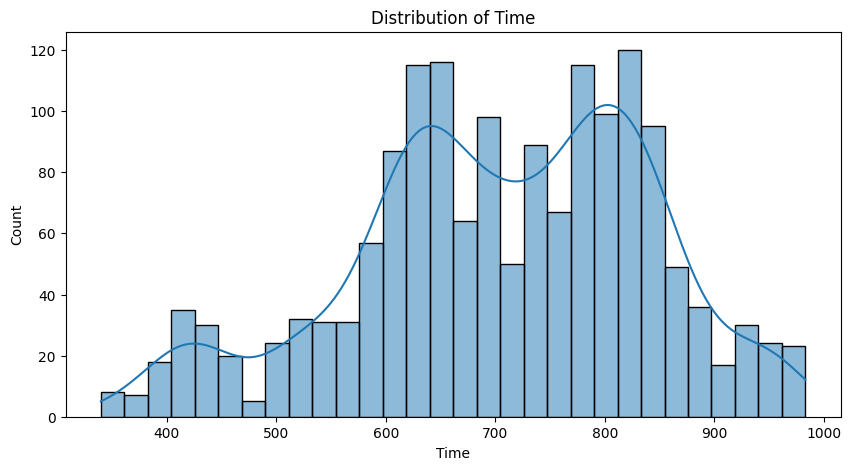

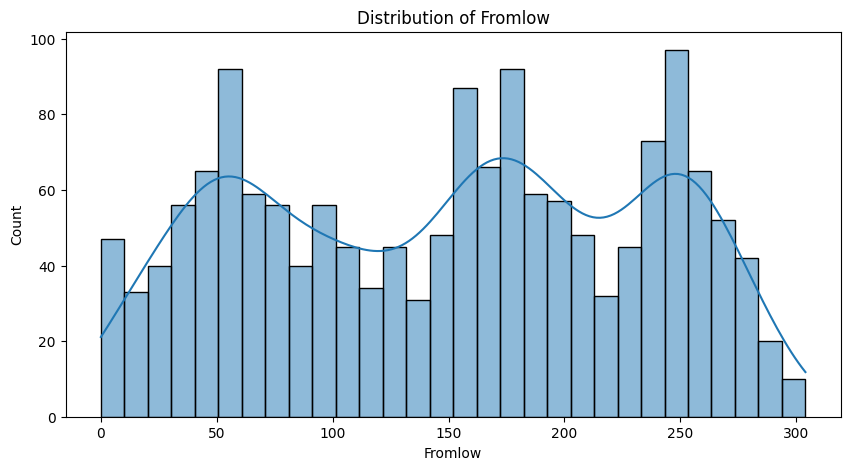

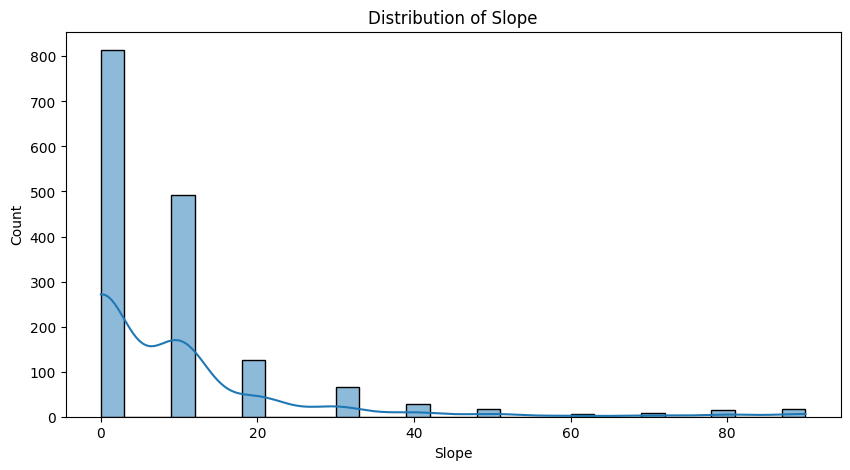

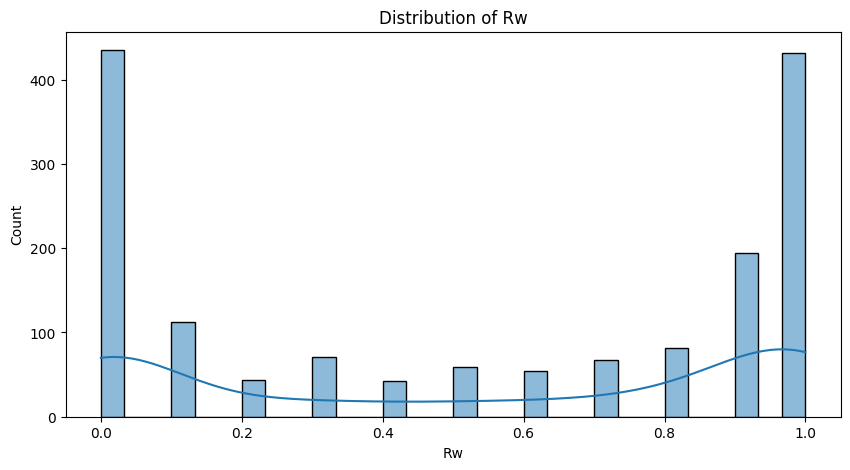

In [ ]:
# Univariate Analysis
#Distribution plot
for col in ['Time', 'Fromlow', 'Slope', 'Rw']:
    plt.figure(figsize=(10,5))
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


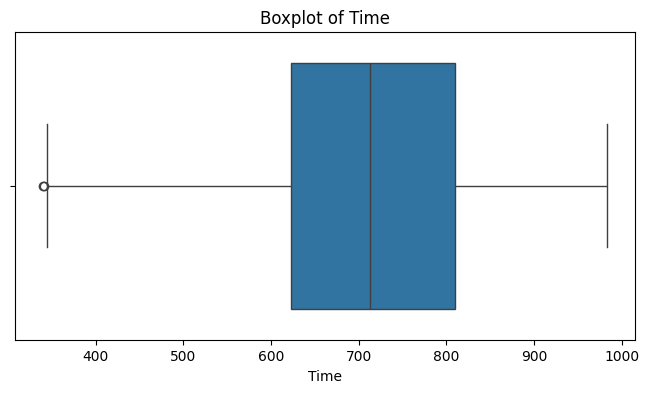

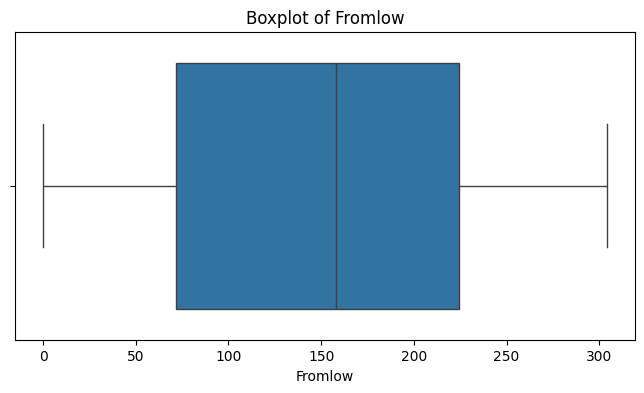

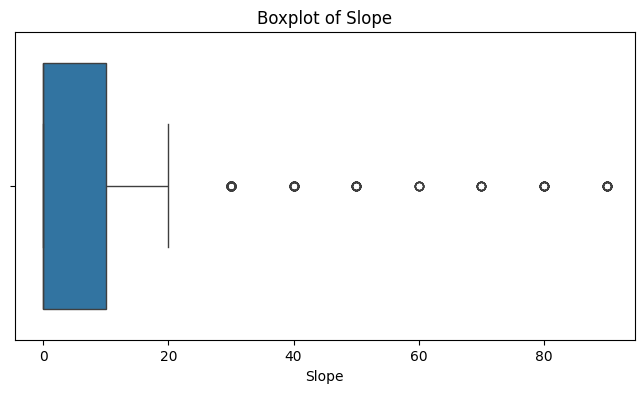

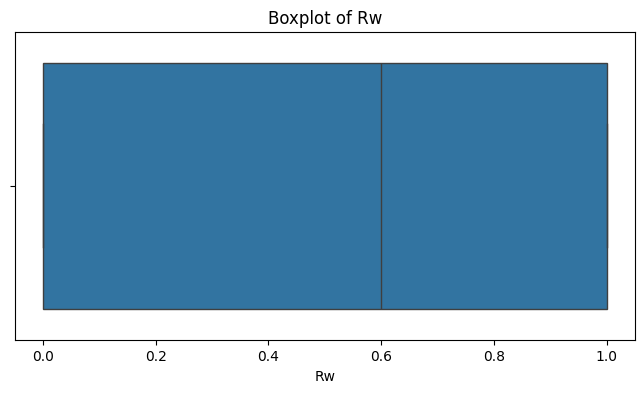

In [ ]:
# Boxplots for numerical variables
for col in ['Time', 'Fromlow', 'Slope', 'Rw']:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


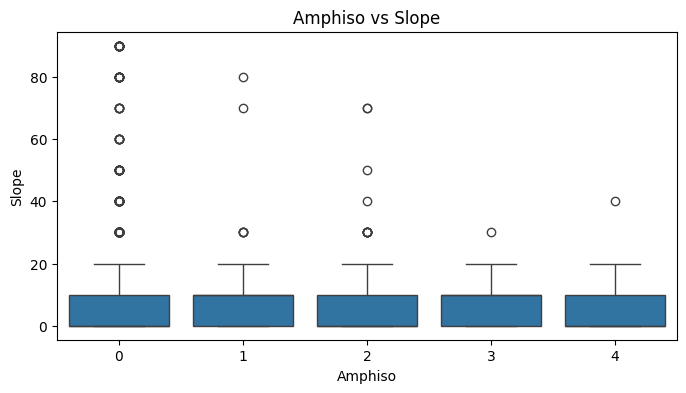

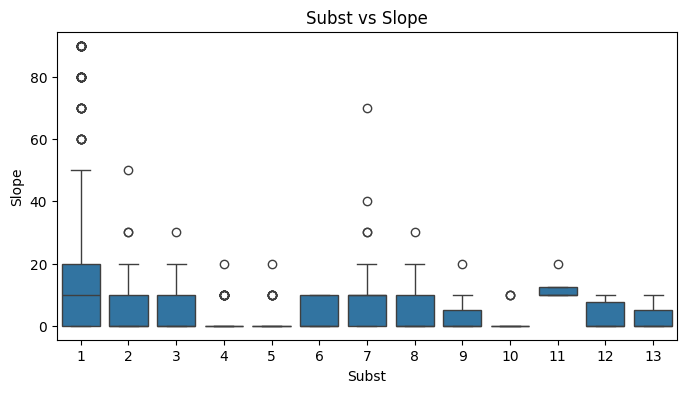

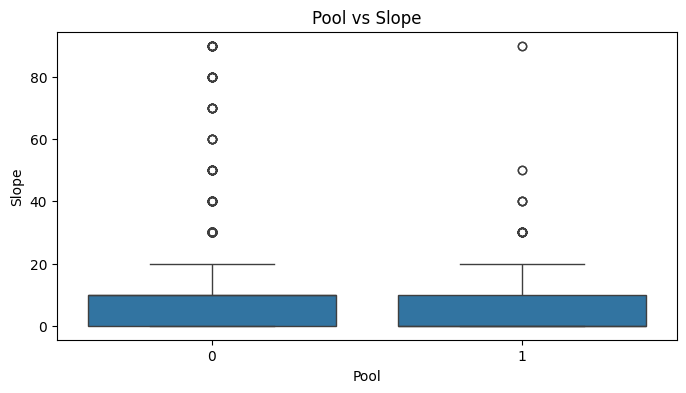

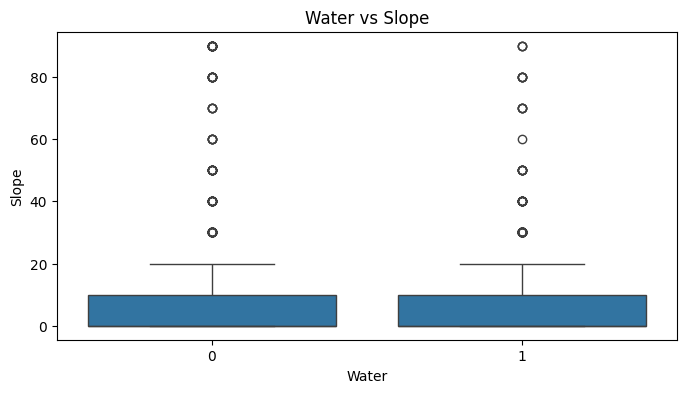

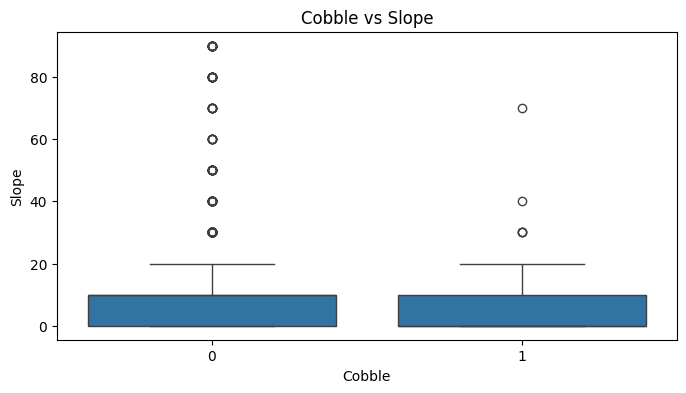

In [ ]:
 # Box plots for categorical vs numerical analysis
for col in ['Amphiso', 'Subst', 'Pool', 'Water', 'Cobble']:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=data[col], y=data['Slope'])
    plt.title(f'{col} vs Slope')
    plt.show()


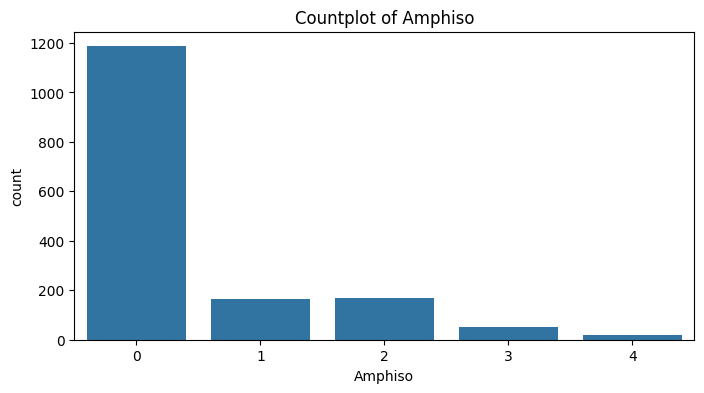

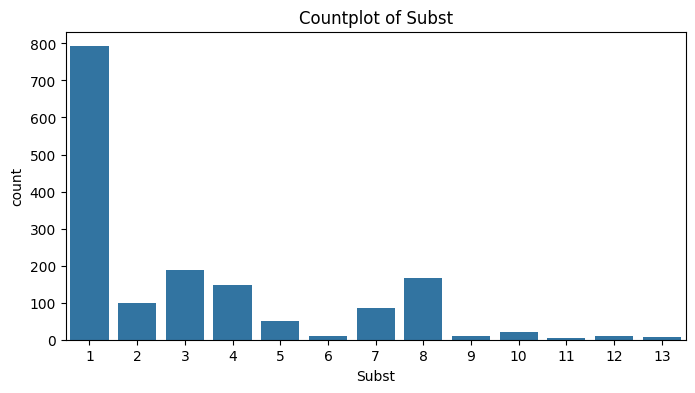

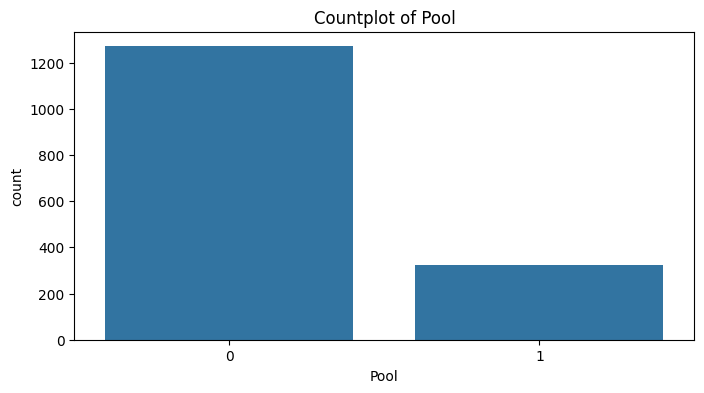

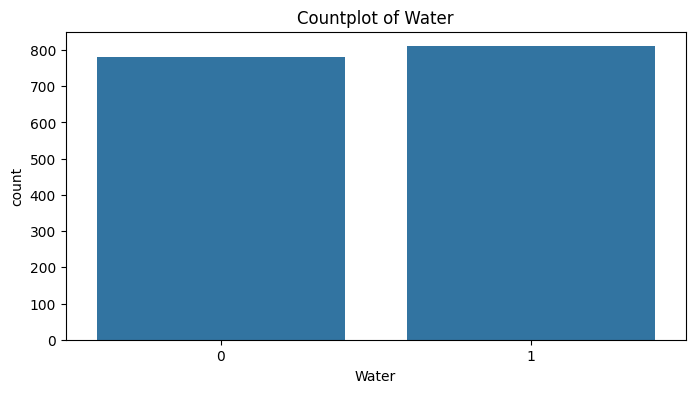

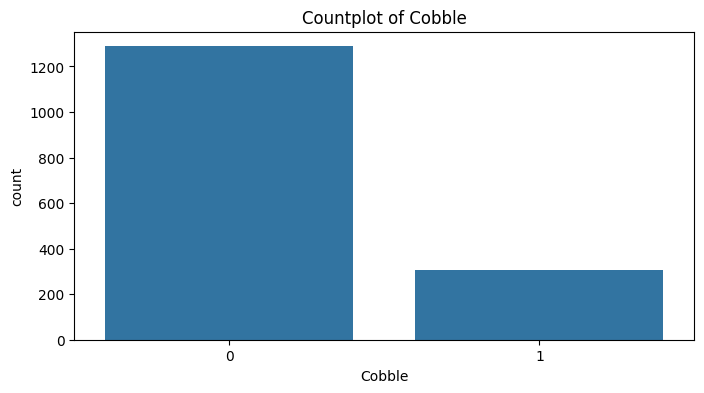

In [ ]:
# Count plots for categorical variables
for col in ['Amphiso', 'Subst', 'Pool', 'Water', 'Cobble']:
    plt.figure(figsize=(8,4))
    sns.countplot(x=data[col])
    plt.title(f'Countplot of {col}')
    plt.show()


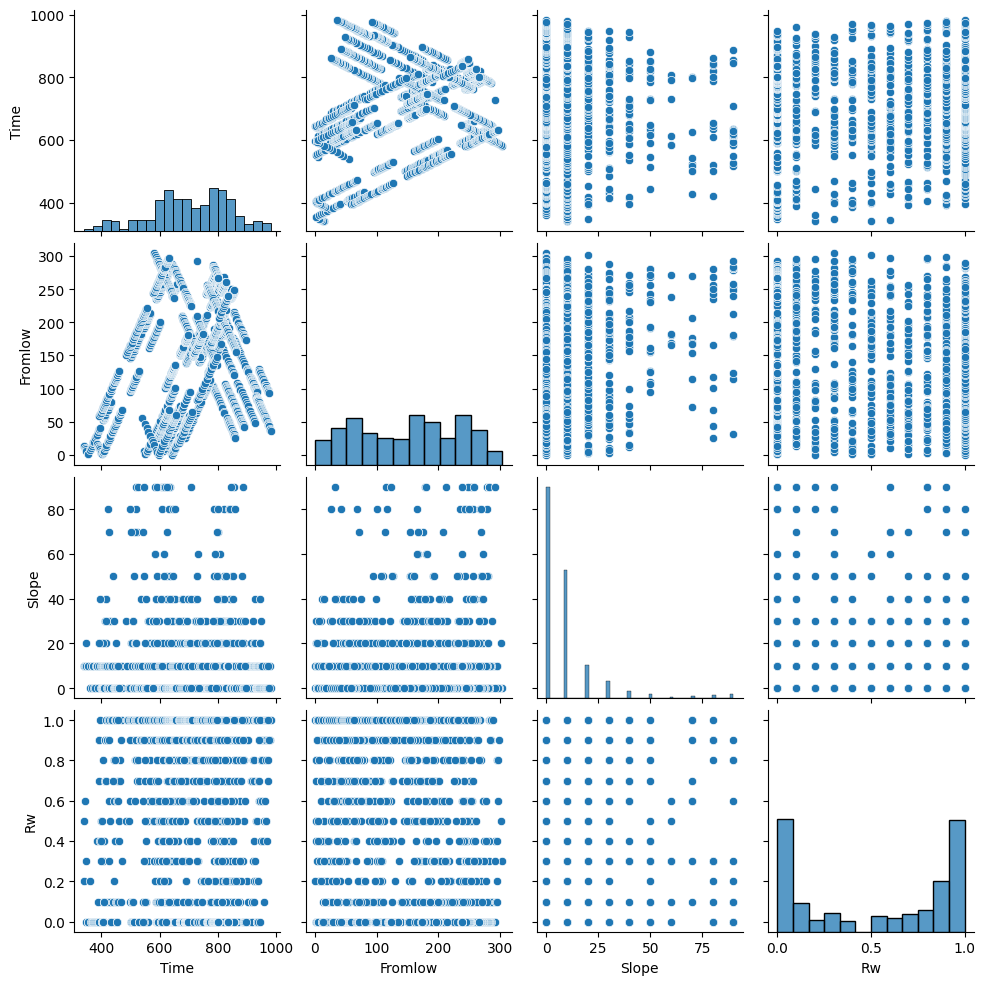

In [ ]:
# Bivariate Analysis
# Scatter plots for numerical variable pairs
sns.pairplot(data[['Time', 'Fromlow', 'Slope', 'Rw']])
plt.show()


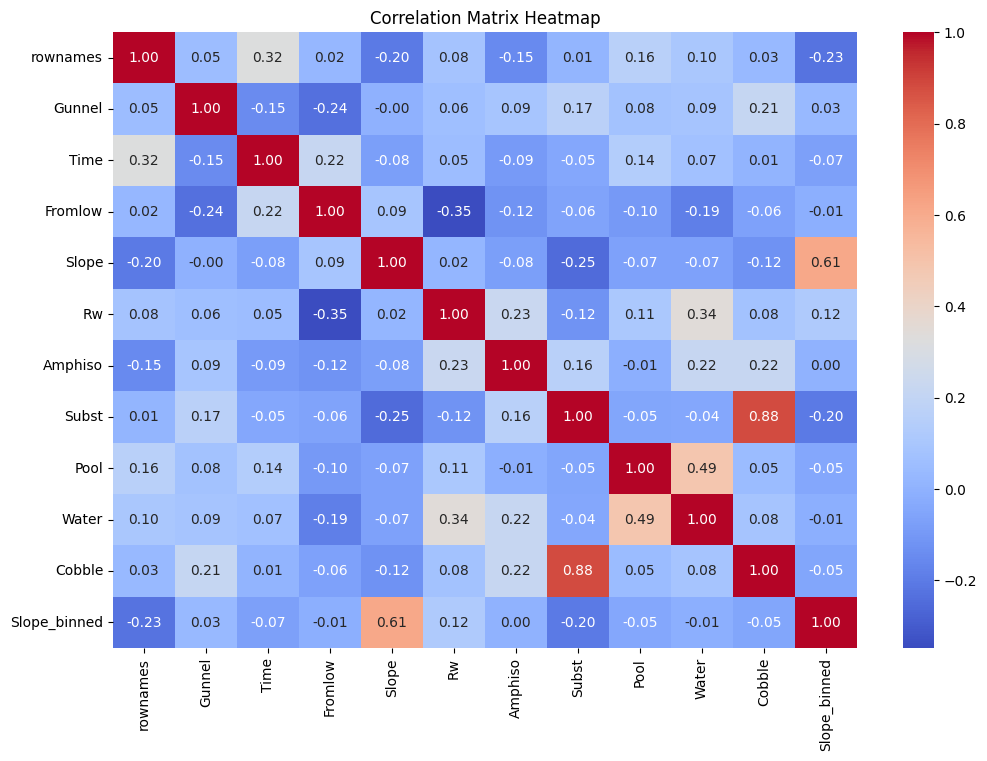

In [ ]:

# Correlation Matrix Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# Convert 'Time' to datetime if applicable
data['Time'] = pd.to_datetime(data['Time'], unit='s')
data.set_index('Time', inplace=True)


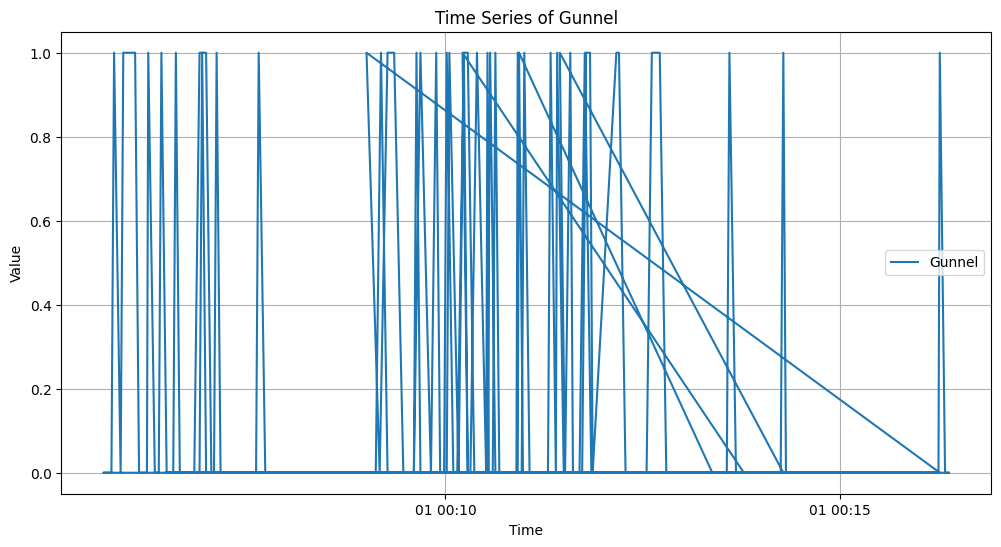

In [ ]:
# Plot time series
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Gunnel'], label='Gunnel')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series of Gunnel')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Stationarity Test (ADATA Test)
adata_test = adfuller(data['Gunnel'])
print("ADATA Statistic:", adata_test[0])
print("p-value:", adata_test[1])
print("Critical Values:", adata_test[4])


ADATA Statistic: -9.128601912640768
p-value: 3.0652656833529233e-15
Critical Values: {'1%': -3.4344876725300977, '5%': -2.863367536731973, '10%': -2.5677429466069728}


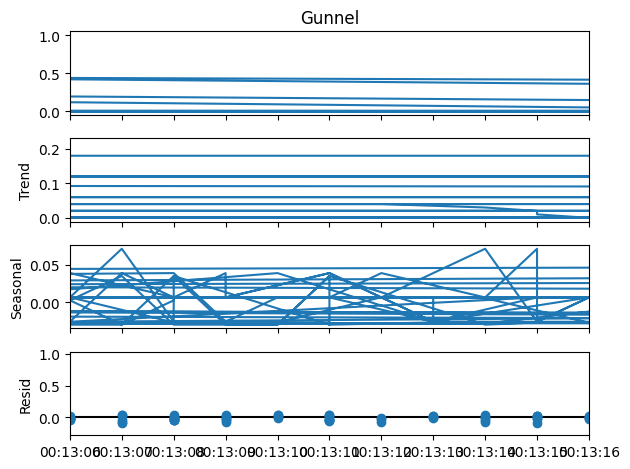

In [ ]:
decomposition = seasonal_decompose(data['Gunnel'], model='additive', period=50)
decomposition.plot()
plt.show()

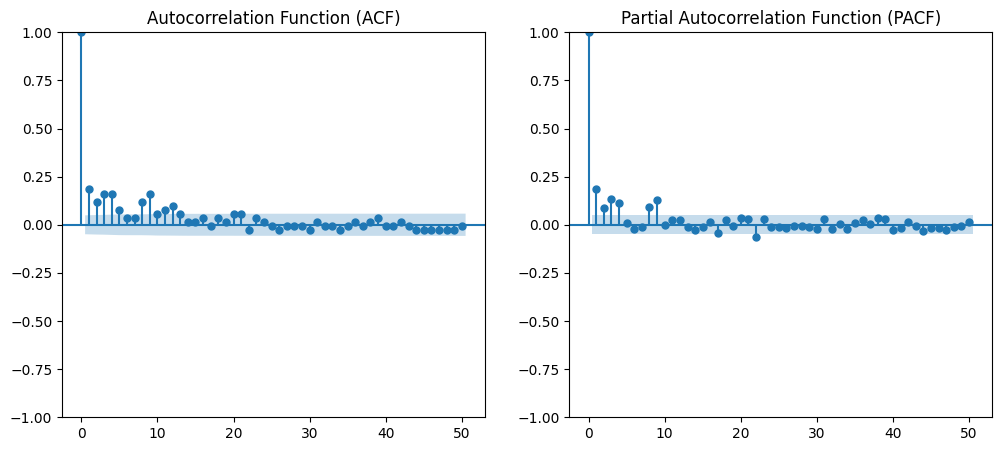

In [ ]:
# ACF & PACF plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_acf(data['Gunnel'], ax=axes[0], lags=50)
axes[0].set_title('Autocorrelation Function (ACF)')
plot_pacf(data['Gunnel'], ax=axes[1], lags=50)
axes[1].set_title('Partial Autocorrelation Function (PACF)')
plt.show()


In [ ]:
# ARIMA Model Fitting
model = ARIMA(data['Gunnel'], order=(1, 0, 1))
fitted_model = model.fit()
print(fitted_model.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsm

                               SARIMAX Results                                
Dep. Variable:                 Gunnel   No. Observations:                 1592
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 607.380
Date:                Mon, 17 Feb 2025   AIC                          -1206.759
Time:                        13:46:28   BIC                          -1185.268
Sample:                             0   HQIC                         -1198.777
                               - 1592                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0301      0.042      0.716      0.474      -0.052       0.113
ar.L1          0.8980      0.017     53.529      0.000       0.865       0.931
ma.L1         -0.7808      0.020    -39.622      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
<ipython-input-165-f4a046e42991>:6: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  plt.plot(pd.date_range(start=data.index[-1], periods=forecast_steps, freq='S'), forecast, label='Forecast', color='red', linestyle='dashed')


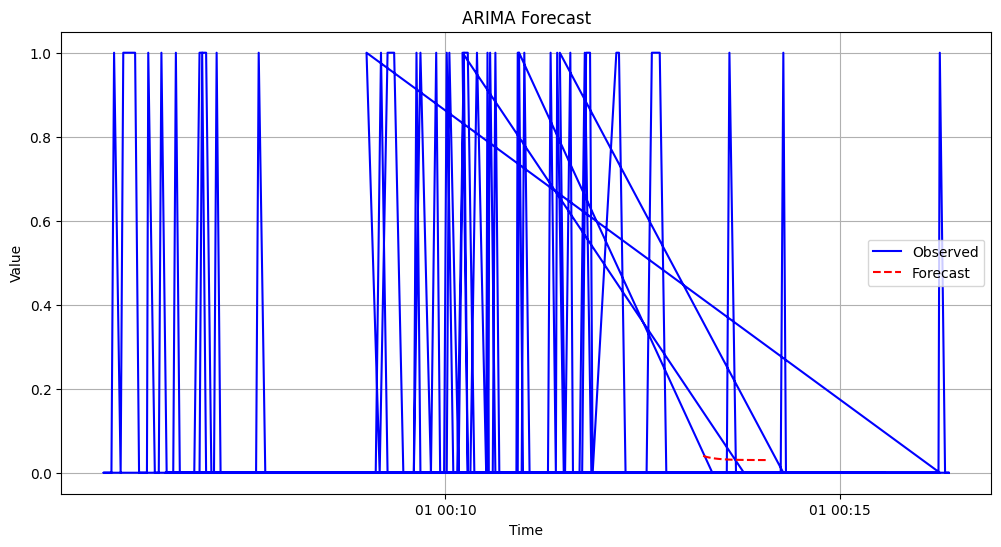

In [ ]:
# Forecasting
forecast_steps = 50
forecast = fitted_model.forecast(steps=forecast_steps)
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Gunnel'], label='Observed', color='blue')
plt.plot(pd.date_range(start=data.index[-1], periods=forecast_steps, freq='S'), forecast, label='Forecast', color='red', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('ARIMA Forecast')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Import required libraries for clustering
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import networkx as nx